<a href="https://colab.research.google.com/github/mslisboa/ProjetoU10T3/blob/main/Implementa%C3%A7%C3%A3o_e_An%C3%A1lise_do_Algoritmo_de_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparação do dataset

In [1]:
!wget -O dataset.zip "https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip"

--2024-12-03 20:38:37--  https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘dataset.zip’

dataset.zip             [    <=>             ]  58.18M  78.8MB/s    in 0.7s    

2024-12-03 20:38:38 (78.8 MB/s) - ‘dataset.zip’ saved [61005872]



In [2]:
!unzip dataset.zip -d dataset

Archive:  dataset.zip
 extracting: dataset/UCI HAR Dataset.names  
 extracting: dataset/UCI HAR Dataset.zip  


In [3]:
!unzip dataset/UCI\ HAR\ Dataset.zip -d "UCI HAR Dataset"

Archive:  dataset/UCI HAR Dataset.zip
   creating: UCI HAR Dataset/UCI HAR Dataset/
  inflating: UCI HAR Dataset/UCI HAR Dataset/.DS_Store  
   creating: UCI HAR Dataset/__MACOSX/
   creating: UCI HAR Dataset/__MACOSX/UCI HAR Dataset/
  inflating: UCI HAR Dataset/__MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt  
  inflating: UCI HAR Dataset/__MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/UCI HAR Dataset/features.txt  
  inflating: UCI HAR Dataset/__MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/UCI HAR Dataset/features_info.txt  
  inflating: UCI HAR Dataset/__MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/UCI HAR Dataset/README.txt  
  inflating: UCI HAR Dataset/__MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/UCI HAR Dataset/test/
   creating: UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/UCI H

In [4]:
!pip install skimpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 61.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.5 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not curr

In [5]:
import numpy as np
import pandas as pd

# carregar features.txt
features = list()
with open('/content/UCI HAR Dataset/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


In [10]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = features
# add subject column to the dataframe
# Removing 'squeeze=True' and converting to Series if needed
subject_data = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt', header=None)
X_train['subject'] = subject_data.iloc[:, 0]  # Extract first column as Series

y_train = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', names=['Activity'])
#Removing 'squeeze=True' and converting to Series if needed
y_train = y_train.iloc[:, 0] # Extract first column as Series
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(10)

<ipython-input-10-205329a308b5>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1082,0.249720,-0.001904,-0.112672,-0.408362,0.013020,-0.623882,-0.478571,0.020512,-0.597018,-0.063898,...,0.509219,-0.380105,0.499614,0.013883,-0.831454,0.213732,0.002520,6,1,WALKING
6285,0.289120,-0.020121,-0.164668,-0.898204,-0.676977,-0.795739,-0.927335,-0.728808,-0.784566,-0.650148,...,-0.065159,0.232944,-0.412321,0.451699,-0.797820,0.236335,-0.003617,28,5,STANDING
5484,0.281217,-0.037326,-0.148302,-0.995668,-0.949758,-0.953789,-0.996252,-0.952019,-0.947741,-0.938346,...,-0.000036,0.474581,0.465079,0.902662,-0.854890,0.158733,-0.066052,26,5,STANDING
3900,0.217424,-0.022700,-0.106453,-0.975585,-0.950248,-0.983110,-0.976929,-0.967475,-0.985013,-0.943272,...,-0.047591,0.294363,0.371649,0.603734,0.822001,-0.470098,-0.501469,19,6,LAYING
6043,0.246373,-0.077363,-0.168839,-0.228226,-0.096511,-0.285065,-0.227920,-0.091395,-0.299023,-0.212699,...,-0.025441,-0.407788,0.915862,0.007379,-0.776602,0.212083,0.125870,27,2,WALKING_UPSTAIRS
5139,0.503811,-0.544314,-0.295827,-0.846446,0.169816,-0.699138,-0.861028,0.299655,-0.686216,-0.783548,...,0.037388,0.264008,-0.112263,0.196878,1.000000,0.248933,-0.789819,25,6,LAYING
612,0.316456,-0.053056,-0.117725,-0.280954,0.081084,-0.347934,-0.336269,0.039512,-0.349988,0.054996,...,-0.413467,0.890066,0.063291,-0.261296,-0.714342,0.263084,0.128921,3,1,WALKING
7198,0.274834,-0.014149,-0.080437,-0.978700,-0.871865,-0.903318,-0.984797,-0.906035,-0.908251,-0.907795,...,0.051835,0.102538,-0.639664,-0.860865,-0.852759,0.199518,0.007930,30,5,STANDING
2467,0.204386,-0.014387,-0.029940,-0.338657,-0.021079,0.184365,-0.385818,-0.040956,0.155601,-0.158981,...,0.636872,0.039295,-0.948114,-0.254630,-0.447897,0.277931,0.359771,14,1,WALKING
2165,0.208126,-0.038549,-0.112156,-0.403469,0.105949,-0.566787,-0.414829,0.150656,-0.553510,-0.379386,...,0.465604,0.426994,-0.841288,-0.345435,-0.792231,0.230462,-0.039848,11,1,WALKING


In [11]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = features
# add subject column to the dataframe
# Removing 'squeeze=True' and converting to Series if needed
subject_data = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt', header=None)
X_test['subject'] = subject_data.iloc[:, 0]  # Extract first column as Series

y_test = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', names=['Activity'])
#Removing 'squeeze=True' and converting to Series if needed
y_test = y_test.iloc[:, 0] # Extract first column as Series
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(10)

<ipython-input-11-504ee63d33a9>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('/content/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
1543,0.274592,-0.020675,-0.113016,-0.994595,-0.973171,-0.984319,-0.994862,-0.973051,-0.983610,-0.938322,...,-0.044955,0.286050,0.824504,0.945097,-0.665342,0.248131,0.198647,13,5,STANDING
1700,0.275640,-0.019522,-0.105445,-0.998163,-0.965139,-0.986620,-0.998621,-0.963227,-0.985740,-0.942917,...,0.049317,0.066282,-0.742886,-0.667655,-0.817557,0.203277,-0.054596,13,5,STANDING
549,0.294916,-0.020138,-0.091818,-0.424284,-0.031435,-0.601174,-0.445377,-0.053928,-0.588008,-0.303786,...,-0.422155,0.714395,0.649846,-0.537901,-0.894244,0.128449,-0.052595,4,1,WALKING
2618,0.278621,0.013043,-0.139954,-0.992154,-0.928519,-0.797275,-0.993502,-0.923800,-0.802930,-0.929575,...,-0.057045,0.054516,0.460203,-0.426906,-0.910566,0.035424,0.037555,24,4,SITTING
1943,0.278587,-0.017507,-0.109610,-0.996121,-0.995477,-0.988781,-0.996401,-0.995134,-0.989657,-0.940743,...,0.360772,-0.122322,-0.450427,-0.661921,0.370711,-0.727292,-0.219056,18,6,LAYING
2102,0.279269,-0.017756,-0.111062,-0.986823,-0.984673,-0.991072,-0.988602,-0.983829,-0.991384,-0.922658,...,0.659663,0.079823,-0.003884,0.008846,0.433427,-0.299951,-0.695745,18,6,LAYING
241,0.267809,-0.013846,-0.117979,-0.531371,-0.155306,-0.549737,-0.566988,-0.209757,-0.552043,-0.475777,...,0.494807,0.280838,-0.001102,0.060517,-0.652221,0.317077,-0.082002,2,1,WALKING
2100,0.294674,-0.016959,-0.108285,-0.984423,-0.985702,-0.983790,-0.985919,-0.985454,-0.981366,-0.917063,...,-0.102311,-0.344180,0.319952,-0.104044,0.437076,-0.302074,-0.694449,18,6,LAYING
1107,0.258885,-0.017583,-0.118279,-0.959962,-0.957389,-0.961887,-0.970267,-0.957562,-0.960035,-0.894861,...,0.180305,0.405519,-0.376509,0.609705,0.527633,0.903108,-0.284310,10,6,LAYING
2889,0.240029,-0.015075,-0.101494,-0.044984,-0.186799,-0.253860,-0.085074,-0.205991,-0.242355,0.201550,...,0.893318,0.840865,-0.291956,-0.799419,-0.832432,0.194267,0.085189,24,3,WALKING_DOWNSTAIRS


In [12]:
# Concatenar train e test para análise conjunta
data = pd.concat([train, test], axis=0, ignore_index=True)

# Verificar dimensões do dataset
print(f"Dimensões do dataset: {data.shape}")

Dimensões do dataset: (10299, 564)


Como o algorítimo K-means não precisa de teste, vamos juntar os dois dataframes.

# Redução de Dimensionalidade

Vamos reduzir a dimensionalidade do dataset removendo a colunas duplicadas, valores com NA e outras análises estatisticas.

Como o dataset é enorme não seria viável fazer análises gráficas como a matriz de correlação, que seria de 561 x 561, ou o biplot do PCA que mostraria 561 vetores sobrepostos, então vamos definir tresholds para que dentro das respectivas matrizes geradas pelos métodos possamos eliminar as colunas (fetures) necesárias.

In [18]:
data.duplicated().any()

False

In [16]:
duplicated_columns = data.columns[data.columns.duplicated()].tolist()
print(duplicated_columns)
len(duplicated_columns)

['fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-9,16', 'fBodyAcc-bandsEnergy()-17,24', 'fBodyAcc-bandsEnergy()-25,32', 'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-41,48', 'fBodyAcc-bandsEnergy()-49,56', 'fBodyAcc-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-17,32', 'fBodyAcc-bandsEnergy()-33,48', 'fBodyAcc-bandsEnergy()-49,64', 'fBodyAcc-bandsEnergy()-1,24', 'fBodyAcc-bandsEnergy()-25,48', 'fBodyAcc-bandsEnergy()-1,8', 'fBodyAcc-bandsEnergy()-9,16', 'fBodyAcc-bandsEnergy()-17,24', 'fBodyAcc-bandsEnergy()-25,32', 'fBodyAcc-bandsEnergy()-33,40', 'fBodyAcc-bandsEnergy()-41,48', 'fBodyAcc-bandsEnergy()-49,56', 'fBodyAcc-bandsEnergy()-57,64', 'fBodyAcc-bandsEnergy()-1,16', 'fBodyAcc-bandsEnergy()-17,32', 'fBodyAcc-bandsEnergy()-33,48', 'fBodyAcc-bandsEnergy()-49,64', 'fBodyAcc-bandsEnergy()-1,24', 'fBodyAcc-bandsEnergy()-25,48', 'fBodyAccJerk-bandsEnergy()-1,8', 'fBodyAccJerk-bandsEnergy()-9,16', 'fBodyAccJerk-bandsEnergy()-17,24', 'fBodyAc

84

In [17]:
data = data.drop(duplicated_columns, axis=1)
data.shape

(10299, 438)

In [22]:
data.isna().any().sum()


0

In [23]:
data.isnull().any().sum()

0

<ipython-input-27-0c20bc047ac0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="viridis")


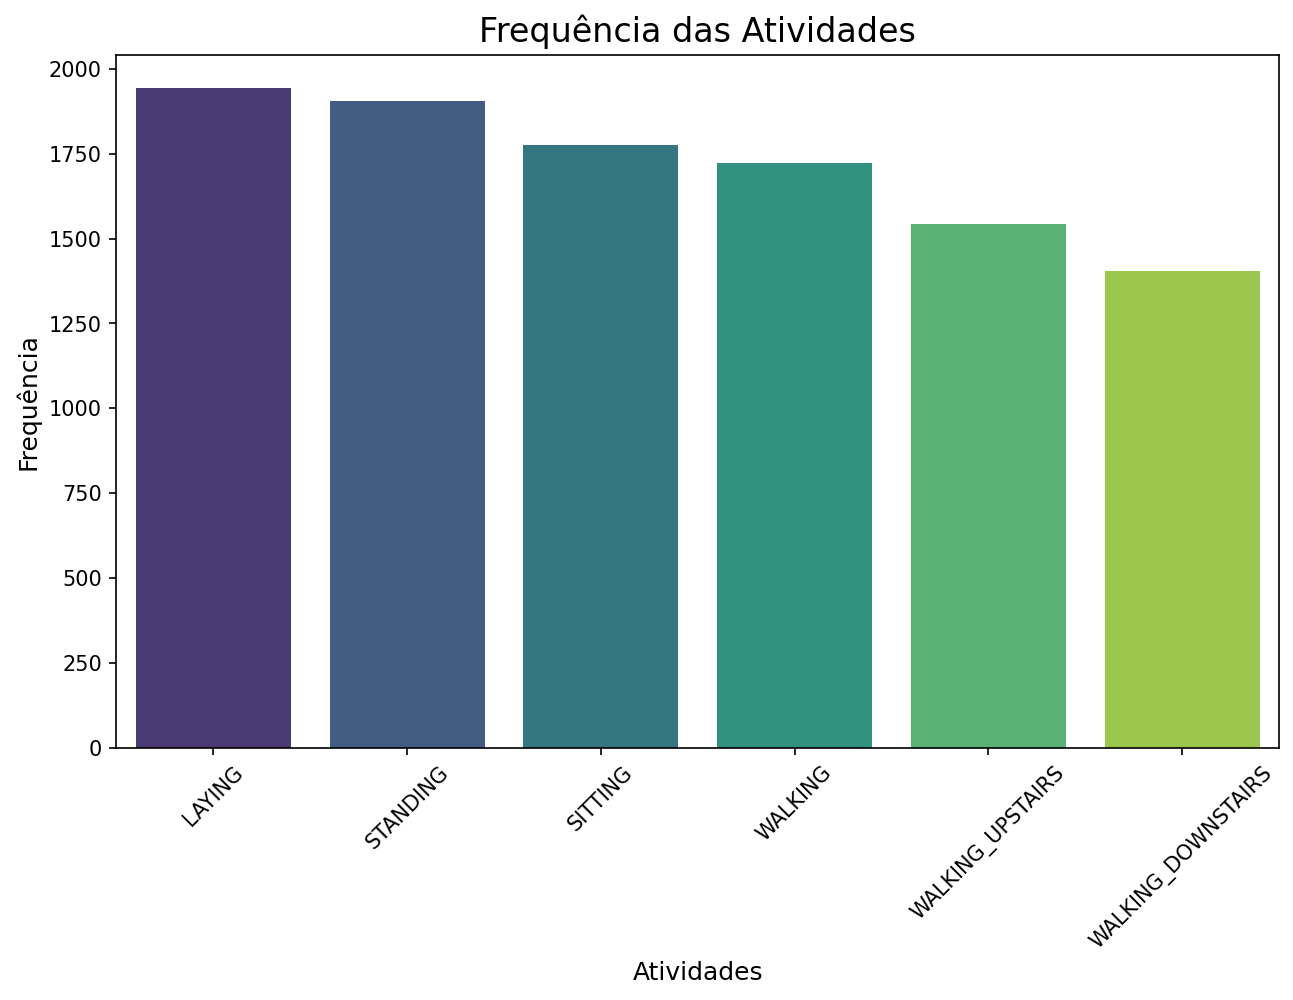

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar a frequência de cada atividade
activity_counts = data['ActivityName'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6), dpi=150)
sns.barplot(x=activity_counts.index, y=activity_counts.values, palette="viridis")
plt.title('Frequência das Atividades', fontsize=16)
plt.xlabel('Atividades', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x, se necessário
plt.show()

As classes estão equilibradas.

In [28]:
numeric_data = data.select_dtypes(include=[np.float64])
numeric_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [33]:
import numpy as np

# Calcular a matriz de correlação
corr_matrix = numeric_data.corr()

# Selecionar colunas altamente correlacionadas (correlação > 0.95)
threshold = 0.95
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Encontrar as colunas a serem removidas
high_corr_cols = [column for column in upper_triangle.columns if any(upper_triangle[column].abs() > threshold)]

print(f"Número de colunas altamente correlacionadas: {len(high_corr_cols)}")
print("Colunas a serem removidas:", high_corr_cols)

# Remover colunas altamente correlacionadas
numeric_data = numeric_data.drop(columns=high_corr_cols)


Número de colunas altamente correlacionadas: 238
Colunas a serem removidas: ['tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tGravityAcc-mad()-X', 'tGravityAcc-mad()-Y', 'tGravityAcc-mad()-Z', 'tGravityAcc-max()-X', 'tGravityAcc-max()-Y', 'tGravityAcc-max()-Z', 'tGravityAcc-min()-X', 'tGravityAcc-min()-Y', 'tGravityAcc-min()-Z', 'tGravityAcc-energy()-X', 'tGravityAcc-iqr()-X', 'tGravityAcc-iqr()-Y', 'tGravityAcc-iqr()-Z', 'tGravityAcc-arCoeff()-X,2', 'tGravityAcc-arCoeff()-X,3', 'tGravityAcc-arCoeff()-X,4', 'tGravityAcc-arCoeff()-Y,2', 'tGravityAcc-arCoeff()-Y,3', 'tGravityAcc-arCoeff()-Y,4', 'tGravityAcc-arCoeff()-Z,2', 'tGravityAcc-arCoeff()-Z,3', 'tGravityAcc-arCoeff()-Z,4', 'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-mad()-X', 'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z',

In [34]:
numeric_data.shape

(10299, 197)

In [35]:
from sklearn.decomposition import PCA
import pandas as pd

# Aplicar PCA
pca = PCA()
pca.fit(numeric_data)

# Obter a carga das variáveis nas componentes principais
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(numeric_data.shape[1])], index=numeric_data.columns)

# Identificar as variáveis mais importantes (com maior valor absoluto nas cargas)
top_features_per_pc = {}
n_top = 10  # Número de variáveis mais importantes por componente
for i in range(len(loadings.columns)):
    top_features = loadings.iloc[:, i].abs().sort_values(ascending=False).head(n_top).index
    top_features_per_pc[f'PC{i+1}'] = top_features

# Consolidar variáveis mais importantes
selected_features = set()
for features in top_features_per_pc.values():
    selected_features.update(features)

print(f"Número de variáveis selecionadas: {len(selected_features)}")
selected_features = list(selected_features)

# Criar dataset com variáveis selecionadas
filtered_data = numeric_data[selected_features]


Número de variáveis selecionadas: 197


O PCA não nos ajudou na análise de dimensionalidade, vamos então utilizar um modelo de Random Forest para nos ajudar a saber a importância das variáveis.

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Preparar os dados (supondo que você tenha 'Activity' como alvo)
X = numeric_data
y = data['Activity']

# Treinar um modelo de Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Obter as importâncias das features
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Selecionar as top N features
n_features = 50  # Defina o número de features desejado
top_features = feature_importances.head(n_features).index

print(f"Selecionadas as {n_features} features mais importantes.")

# Criar dataset com features importantes
numeric_data = numeric_data[top_features]

Selecionadas as 50 features mais importantes.


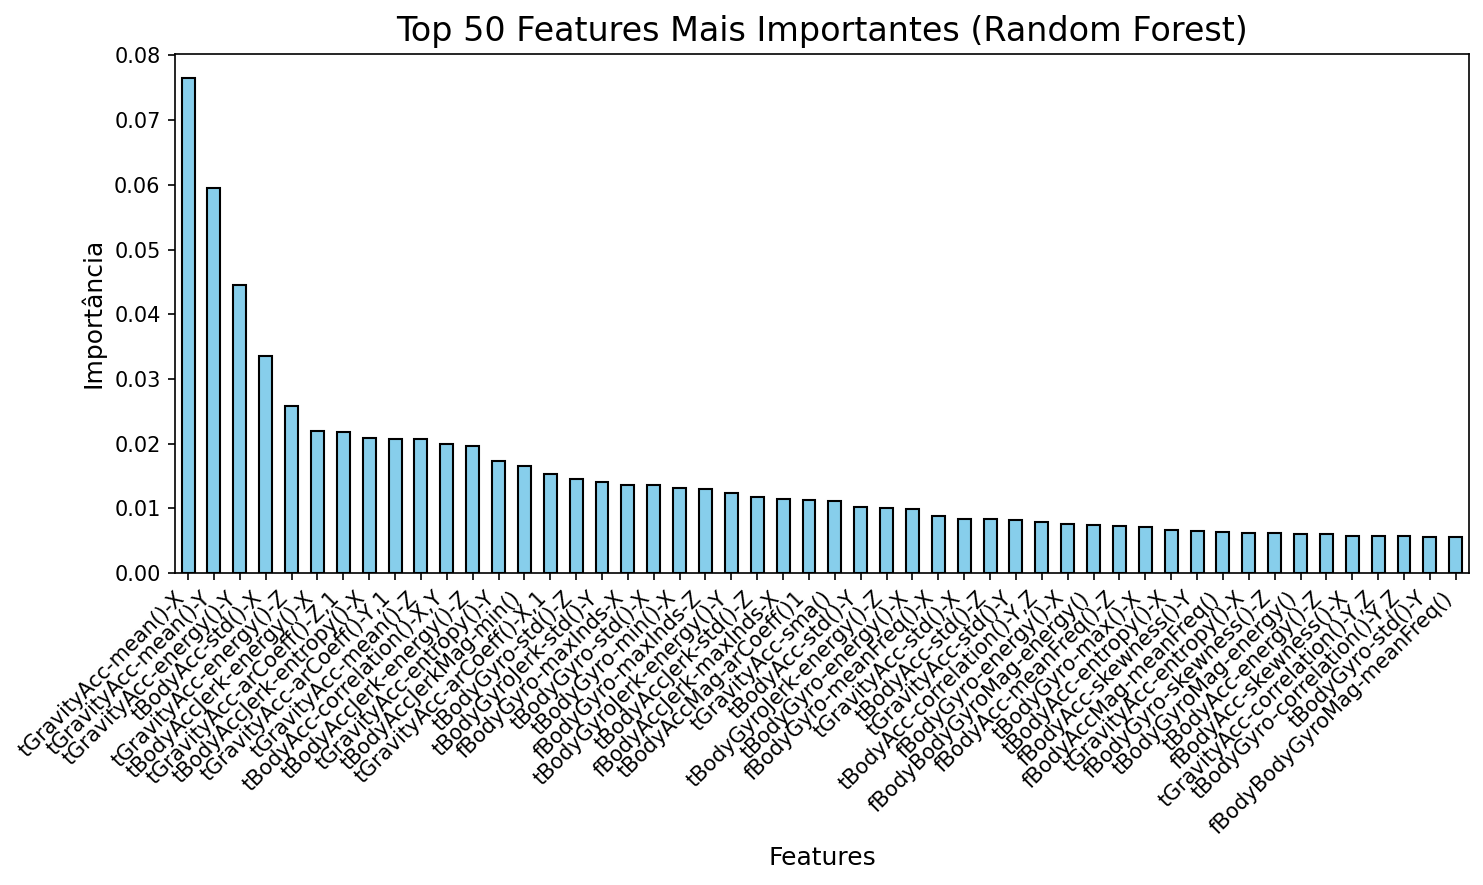

In [40]:
top_n = 50
plt.figure(figsize=(10, 6), dpi=150)
feature_importances.head(top_n).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title(f'Top {top_n} Features Mais Importantes (Random Forest)', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importância', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
O RandomForest é um método de machine learning onde várias árvores de decisão são escolhidas

In [39]:
from skimpy import skim

skim(numeric_data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 10299  │ │ float64     │ 50    │                                                          │
│ │ Number of columns │ 50     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA ┃ NA % ┃ mean     ┃ sd      ┃ p0 ┃ p25      ┃ p50      ┃ p75       ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ tGravityAcc-mean() │  0 │    0 │   0.6692 │  0.5155 │ -1 │   0.8117 │   0.9218 │    0.9547 │    1 │  ▁▁  ▇ │  │
│ │ -X                 │    │      │          │         │    │          │          │           │      │        │  │
│ │ tGravityAcc-mean() │  0 │    0 │ 0.004039 │  0.3789 │ -1 │  -0.2429 │  -0.1436 │    0.1189 │    1 │  ▁▇▂▁▂ │  │
│ │ -Y                 │    │      │          │         │    │          │          │           │      │        │  │
│ │ tGravityAcc-energy │  0 │    0 │  -0.7215 │  0.4544 │ -1 │   -0.968 │  -0.9098 │   -0.7668 │    1 │   ▇▁   │  │
│ │ ()-Y               │    │      │          │         │    │          │          │           │      │        │  │
│ │ tBodyAcc-std()-X   │  0 │    0 │  -0.6078 │  0.4387 │ -1 │  -0.9924 │   -0.943 │   -0.2503 │    1 │  ▇▂▃▁  │  │
│ │ tGravityAcc-energy │  0 │    0 │  -0.7636 │  0.4241 │ -1 │  -0.9911 │  -0.9508 │   -0.7872 │    1 │   ▇▁   │  │
│ │ ()-Z               │    │      │          │         │    │          │          │           │      │        │  │
│ │ tBodyAccJerk-energ │  0 │    0 │  -0.8503 │  0.2148 │ -1 │  -0.9999 │  -0.9985 │    -0.746 │    1 │   ▇▁   │  │
│ │ y()-X              │    │      │          │         │    │          │          │           │      │        │  │
│ │ tGravityAcc-arCoef │  0 │    0 │  -0.4281 │  0.2683 │ -1 │    -0.62 │  -0.4261 │   -0.2487 │    1 │  ▃▇▆▁  │  │
│ │ f()-Z,1            │    │      │          │         │    │          │          │           │      │        │  │
│ │ tBodyAccJerk-entro │  0 │    0 │ -0.08261 │  0.6527 │ -1 │  -0.7298 │  -0.3377 │    0.5994 │    1 │ ▇▃▁ ▇▃ │  │
│ │ py()-X             │    │      │          │         │    │          │          │           │      │        │  │
│ │ tGravityAcc-arCoef │  0 │    0 │  -0.3436 │  0.2933 │ -1 │  -0.5461 │  -0.3418 │   -0.1434 │    1 │  ▃▇▇▂  │  │
│ │ f()-Y,1            │    │      │          │         │    │          │          │           │      │        │  │
│ │ tGravityAcc-mean() │  0 │    0 │  0.09215 │  0.3343 │ -1 │  -0.1167 │   0.0368 │    0.2162 │    1 │  ▁▇▇▂▂ │  │
│ │ -Z                 │    │      │          │         │    │          │          │           │      │        │  │
│ │ tBodyAcc-correlati │  0 │    0 │  -0.1203 │  0.3577 │ -1 │  -0.3617 │  -0.1612 │   0.08015 │    1 │ ▁▅▇▅▂▁ │  │
│ │ on()-X,Y           │    │      │          │         │    │          │          │           │      │        │  │
│ │ tBodyAccJerk-energ │  0 │    0 │  -0.9307 │  0.1179 │ -1 │  -0.9998 │  -0.9983 │   -0.8928 │    1 │   ▇    │  │
│ │ y()-Z              │    │      │          │         

Agora conseguimos reduzir as variáveis para as 50 que mais conseguem separar os nossos dados para classificação das atividades, com isso vamos prosseguir com o KMeans